# Introduction

On se demande souvent si les résultats d'un athlète sont un indicateur fiable de sa performance. Cette question est cruciale pour les athlètes cherchant à améliorer leurs performances, sachant qu'ils sont finalement évalués sur leurs résultats. La notion de paliers de performance est également abordée, questionnant si ces paliers sont universels ou spécifiques à chaque athlète. La problématique centrale est de déterminer si l'on peut établir un lien direct entre les performances de l'athlète et ses résultats, et si les sportifs progressent à travers des niveaux quantifiables.

Nous avons choisi le tennis comme cas d'étude, car c'est un sport individuel où les performances du joueur sont directement liées aux résultats, contrairement aux sports collectifs où la performance d'un athlète est impactée par celles de ses coéquipiers. De plus, le tennis offre une richesse de données et de paramètres permettant d'analyser la performance de part son aspect très segmenté. L'objectif est d'examiner si les performances des joueurs du top 10 de l'ATP (Association tennis professional, c'est à dire la ligue professionnelle mondiale) diffèrent significativement de celles des joueurs classés entre la 40ème et la 50ème place mondiale. L'approche consiste à analyser les performances sur une année pour mieux comprendre le niveau moyen et l'existence de paliers.

Dans un documentaire sur Jimmy Connors,  Mike Tyson, légende de la boxe anglaise,  illustre la complexité du tennis en faisant des liens très proches entre ces différents sports, la fois technique et mental. La recherche vise à quantifier la performance en tenant compte de ces aspects, en se demandant si les grands joueurs possèdent un avantage psychologique dans les situations de tension.

Enfin, l'étude se penche sur l'utilisation du Machine Learning pour prédire le classement d'un joueur en fin de saison en fonction de ses performances annuelles, en comparant différentes techniques.


# Plan
### 1- Différence entre l'élite (top 10) et joueur "moyen" (top 40-50): la Régularité

Nous allons montrer que la principale différence entre l'élite et le reste est la $\textbf{régularité}$, les meilleurs joueurs arrivent à rester constant tout au long de l'année, ce qui n'est pas le cas du reste. Pour cela nous allons visualiser l'évolution du rang de ces deux classes au cours du temps et montrer que les classements des joueurs du top 10 fluctuent beaucoup moins. 

Cette Régularité se traduit également par le nombre de victoires durant l'année qui est bien supérieur pour les meilleurs joueurs.

### 2- Différences statistiques entre les deux classes de joueurs ?

Au delà de la différence de régularité, nous allons nous demander s'il existe des différences statistiques entre les joueurs du top 10 et ceux du top 40-50. Pour se faire nous regarderons des statistiques clefs d'un match telles que par exemple:

- Le comportement du joueur quand il est sous pression
- Ses services
- Le nombre de matches qu'il joue dans une saison

### 3- Comparaison entre joueurs de même classe

Enfin, nous pouvons nous demander si au sein d'une classe il existe des différences aussi marquantes qu'entre les deux populations.
Nous verrons que oui, et le plus intéressant à remarquer est que les meilleurs joueurs basent leur style de jeu sur leurs points en exacerbant leurs qualités.




In [2]:
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn
import class_joueur as cj


In [4]:
#Import des données 
df_info_rank=pd.read_csv('./Data/Data_utiles/info_rank_after_treatment')

df_info_rank.head()

Unnamed: 0  ranking_date  rank  player_id  points name_first name_last  \
0           0      19900101     1     100656  2913.0       Ivan     Lendl   
1           1      19900101     2     101414  2279.0      Boris    Becker   
2           2      19900101     3     101222  2111.0     Stefan    Edberg   
3           3      19900101     4     100763  1398.0       Brad   Gilbert   
4           4      19900101     5     100581  1354.0       John   McEnroe   

  hand  height  
0    R   188.0  
1    R   190.0  
2    R   188.0  
3    R   185.0  
4    L   180.0

# 1- Différence entre l'élite (top 10) et joueur "moyen" (top 40-50): la Régularité


### Visualisation de l'évolution du rang des joueurs au cours du temps

On va créer une fonction qui permet d'afficher l'évolution des joueurs du top 10 et les joueurs entre 40-50 sur une saison

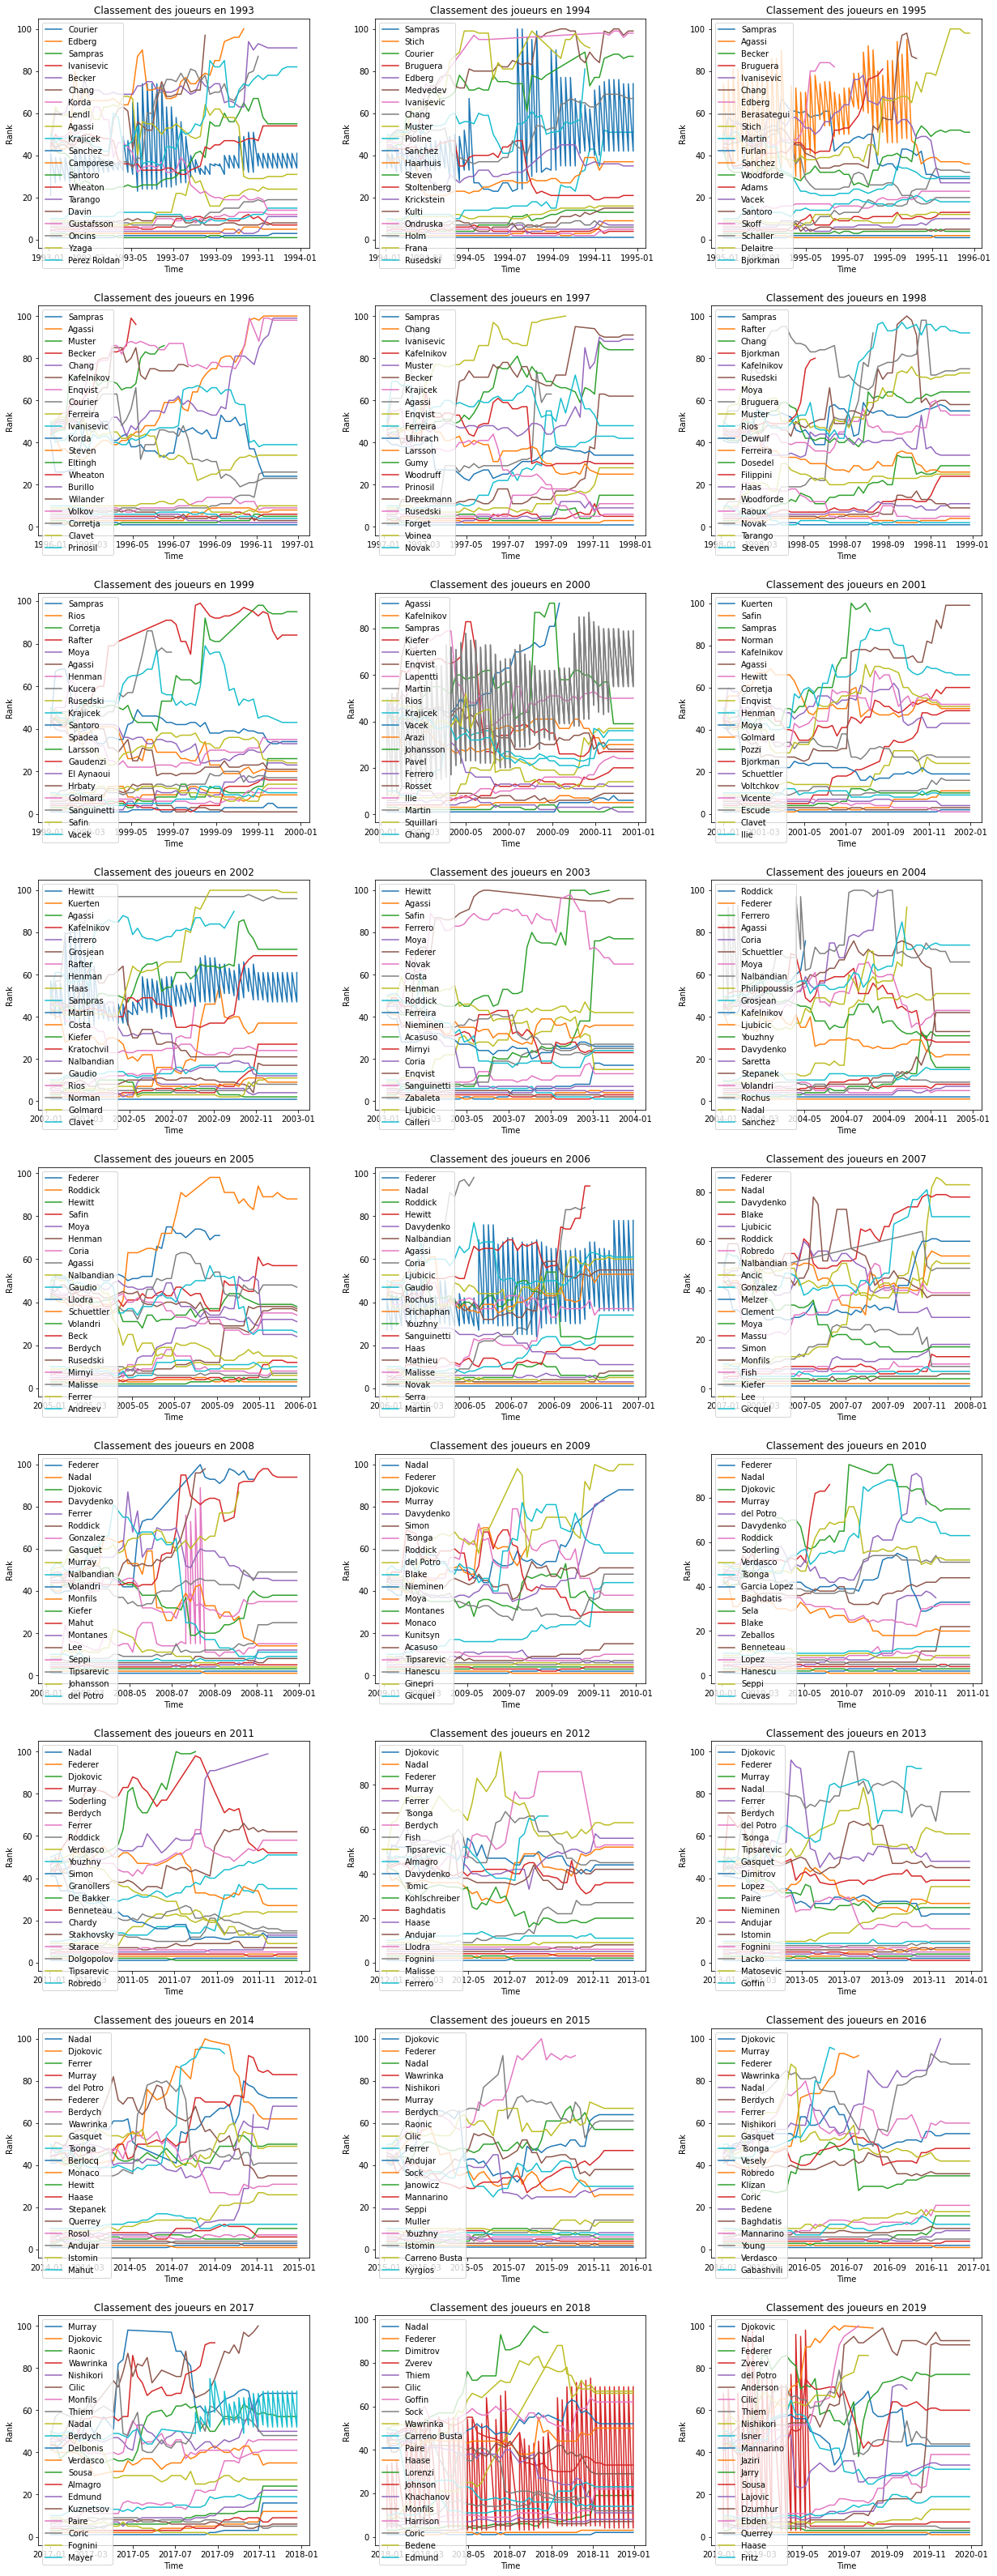

In [5]:

def visualisation_rank(year, dataset, ax):
    """Cette fonction trace l'évolution du rang des joueurs du top 10 et du top 4"""
    df_year = dataset[(dataset['ranking_date'] >= year * 10000) & (dataset['ranking_date'] < (year + 1) * 10000)].copy()

    noms_10 = [nom for nom in df_year[:10]['name_last']]
    noms_40 = [nom for nom in df_year[40:50]['name_last']]
    noms = noms_10 + noms_40

    for i, nom in enumerate(noms):
        df_individu = df_year[df_year['name_last'] == nom].copy()
        df_individu['ranking_date'] = pd.to_datetime(df_individu['ranking_date'], format='%Y%m%d')

        ax.plot(df_individu['ranking_date'], df_individu['rank'], label='{}'.format(nom))

    ax.set_xlabel('Time')
    ax.set_ylabel('Rank')
    ax.set_title('Classement des joueurs en {}'.format(year))
    ax.legend(loc='upper left')

# On Calcule le nombre de lignes nécessaires en fonction du nombre d'années
num_years = len(range(1993, 2020))
num_rows = (num_years // 3) + (1 if num_years % 3 != 0 else 0)

# On Crée une disposition en grille pour les sous-plots
fig, axs = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))
fig.tight_layout(pad=5.0)

#On Utilise une boucle pour créer des sous-plots pour chaque année
for i, year in enumerate(range(1993, 2020)):
    row = i // 3
    col = i % 3
    visualisation_rank(year, df_info_rank, axs[row, col])


# Afficher la figure
plt.show()

        
    

### Analyse

On remarque que les classements des joueurs qui au début de la saison étaient dans le top 10 fluctuent beaucoup moins que ceux des joueurs entre 40 et 50.

Pour en être sûr nous pouvons regarder la moyenne ainsi que les écarts types du rang de chaque joueur sur une saison. 


In [6]:
def stats_rank(year,dataset):
    """Fonction qui chaque année renvoie un dataset avec pour chaque joueur son rang moyen ainsi que la variance
        de son rang.
        
        Elle renvoie aussi le rang moyen du top 10 et top 40-50 sur une saison (de même pour la variance moyenne)
    """
    df_year = dataset[(dataset['ranking_date'] >= year * 10000) & (dataset['ranking_date'] < (year + 1) * 10000)].copy()

    noms_10 = [nom for nom in df_year[:10]['name_last']]
    noms_40 = [nom for nom in df_year[40:50]['name_last']]
    noms = noms_10 + noms_40
    
    liste_moyenne=[]
    liste_std=[]
    for nom in noms:
        liste_moyenne.append(df_year[df_year['name_last'] == nom].copy()['rank'].mean())
        liste_std.append(df_year[df_year['name_last'] == nom].copy()['rank'].std())
    
    #On regarde en moyenne quelle est le classement sur une année du top 10 et top 50
    moyenne_10=sum(liste_moyenne[:10])/10
    moyenne_50=sum(liste_moyenne[10:20])/10

    #On regarde en moyenne quel est l'écart type sur des joueurs sur une saison 
    std_10=sum(liste_std[:10])/10
    std_50=sum(liste_std[10:20])/10
    
    df_stats_rank=pd.DataFrame(list(zip(noms,liste_moyenne,liste_std)), columns=["Noms","Rang Moyen","Std"])
    return df_stats_rank,moyenne_10,moyenne_50,std_10,std_50

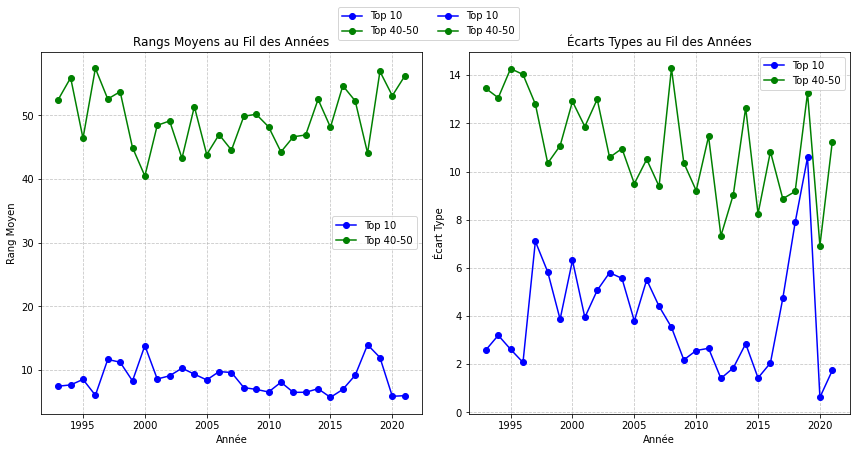

In [7]:

liste_moyennes_10=[]
liste_std_10=[]

liste_moyennes_50=[]
liste_std_50=[]

temps=[i for i in range(1993,2022)]

for year in range(1993,2022):
    
    df_stats_rank,moyenne_10,moyenne_50,std_10,std_50=stats_rank(year,df_info_rank)
    liste_moyennes_10.append(moyenne_10)
    liste_moyennes_50.append(moyenne_50)
    liste_std_10.append(std_10)
    liste_std_50.append(std_50)


# Définir une couleur commune pour les deux styles de lignes pour une meilleure cohérence
couleur_top_10 = 'b'
couleur_top_50 = 'g'

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Tracé des rangs moyens
ax[0].plot(temps, liste_moyennes_10, label='Top 10', color=couleur_top_10, linestyle='-', marker='o')
ax[0].plot(temps, liste_moyennes_50, label='Top 40-50', color=couleur_top_50, linestyle='-', marker='o')

# Ajout de lignes de grille pour une meilleure lisibilité
ax[0].grid(True, linestyle='--', alpha=0.7)

# Tracé des écarts types
ax[1].plot(temps, liste_std_10, label='Top 10', color=couleur_top_10, linestyle='-', marker='o')
ax[1].plot(temps, liste_std_50, label='Top 40-50', color=couleur_top_50, linestyle='-', marker='o')

# Ajout de lignes de grille pour une meilleure lisibilité
ax[1].grid(True, linestyle='--', alpha=0.7)

# Titres et étiquettes
ax[0].set_title('Rangs Moyens au Fil des Années')
ax[1].set_title('Écarts Types au Fil des Années')

ax[0].set_xlabel('Année')
ax[0].set_ylabel('Rang Moyen')

ax[1].set_xlabel('Année')
ax[1].set_ylabel('Écart Type')

# Légendes
ax[0].legend()
ax[1].legend()

# Ajout d'une légende commune pour les deux sous-graphiques
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

# Ajustement de la mise en page pour un meilleur espacement
plt.tight_layout()

# Afficher le graphique
plt.show()


### Analyse

On voit ainsi que la $\textbf{différence d'écart-type entre les joueurs du top 10 et du top 40-50 est flagrante}$. Les joueurs du top 40-50 ont une fluctuation moyenne de +- 14 places, tandis que les joueurs du top 10 ont une fluctuation de 5 places en moyenne. Il semble donc que les joueurs du top 10 sont bien plus stables dans leurs performances. Essayons maintenant de montrer cela.

### Comparaison entre les joueurs : lien entre classement et winrate ?

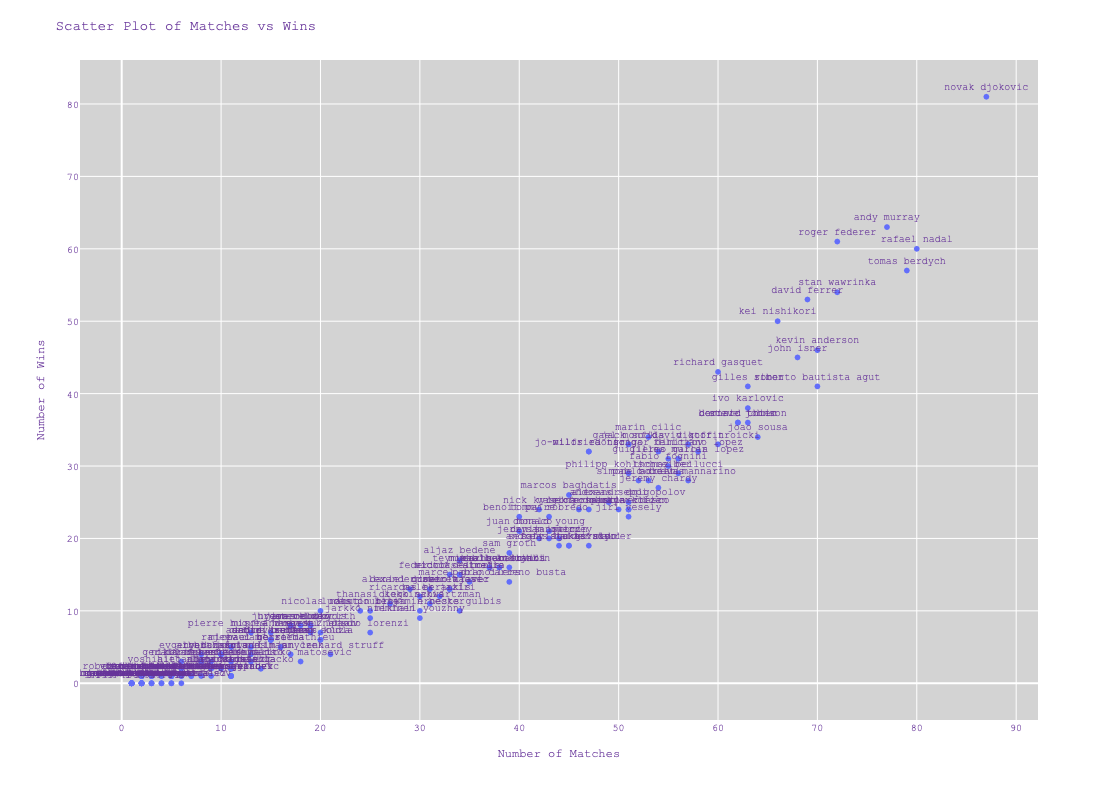

In [8]:
df_info_joueurs_2015=pd.read_csv('./Data/Data_utiles/Data_ML/infos_joueurs_2015.csv')

df_info_joueurs_2015=df_info_joueurs_2015[['name','matchs','win']]
df_info_joueurs_2015.head()


# Create a scatter plot
fig = px.scatter(df_info_joueurs_2015, x='matchs', y='win', text='name', hover_data=['name'])

# Make the plot interactive by showing the player's name when you hover over a point
fig.update_traces(textposition='top center')

# Update layout properties to customize the format
fig.update_layout(
    title='Scatter Plot of Matches vs Wins',
    xaxis_title='Number of Matches',
    yaxis_title='Number of Wins',
    font=dict(family="Courier New, monospace", size=10, color="RebeccaPurple"),
    paper_bgcolor='white',  # Background color of the plot
    plot_bgcolor='lightgray',   # Background color of the plot area
    hoverlabel=dict(bgcolor="white", font_size=12),  # Hover label customization
    showlegend=True,  # Show legend if applicable
    height=800,  # Set the height of the figure
    width=1000    # Set the width of the figure
)

# Show the figure
fig.show()


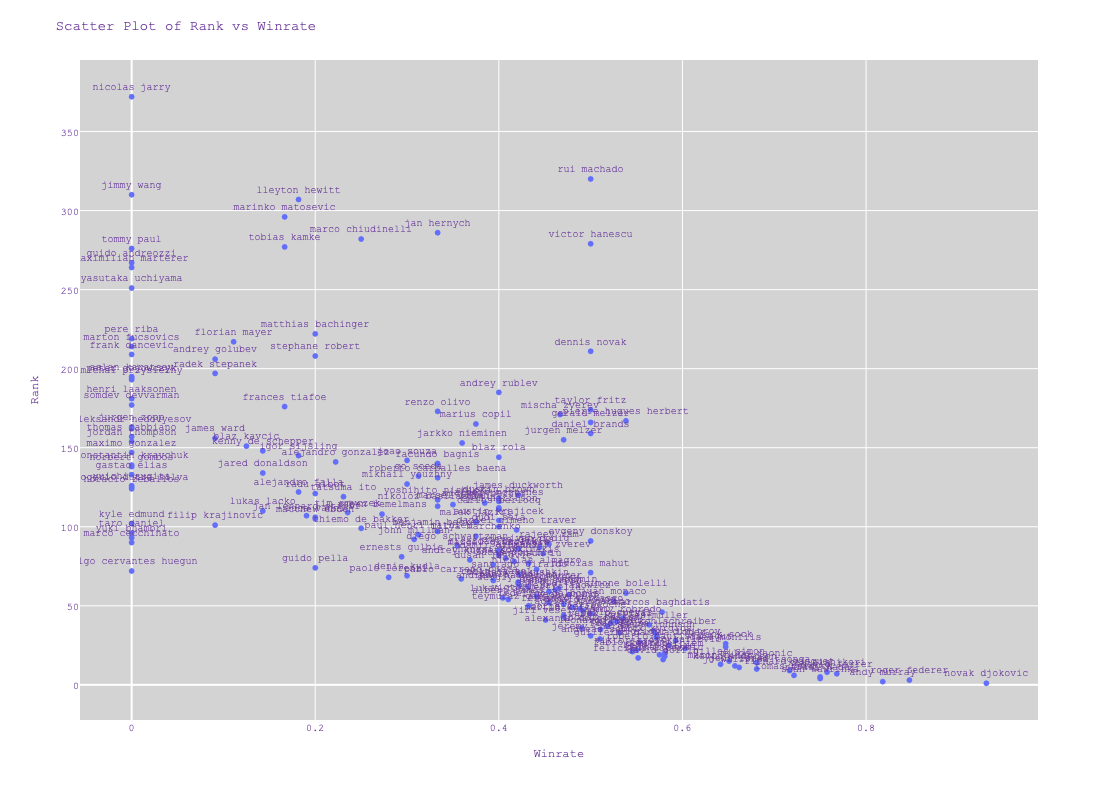

In [9]:
df_info_joueurs_2015=pd.read_csv('./Data/Data_utiles/Data_ML/infos_joueurs_2015.csv')

df_info_joueurs_2015['winrate']=df_info_joueurs_2015['win']/df_info_joueurs_2015['matchs']
df_info_joueurs_2015.head()

# Create a scatter plot
fig = px.scatter(df_info_joueurs_2015, x='winrate', y='rang', text='name', hover_data=['name'])

# Make the plot interactive by showing the player's name when you hover over a point
fig.update_traces(textposition='top center')

# Update layout properties to customize the format
fig.update_layout(
    title='Scatter Plot of Rank vs Winrate',
    xaxis_title='Winrate',
    yaxis_title='Rank',
    font=dict(family="Courier New, monospace", size=10, color="RebeccaPurple"),
    paper_bgcolor='white',  # Background color of the plot
    plot_bgcolor='lightgray',   # Background color of the plot area
    hoverlabel=dict(bgcolor="white", font_size=12),  # Hover label customization
    showlegend=True,  # Show legend if applicable
    height=800,  # Set the height of the figure
    width=1000    # Set the width of the figure
)

# Show the figure
fig.show()

### Analyse :

On remarque de manière flagrante que les joueurs les mieux classés sont ceux qui :

- Ont un winrate très élevé
- Mais également qui jouent un grand nombre de matches. En effet il peut y avoir un grand écart entre deux joueurs qui ont le même winrate si ceux-ci n'ont pas joué le même nombre de matches. Par exemple entre Dennis Novac (211ème avec un winrate de 0.5) et Andres Seppi (29ème avec un winrate de 0.5 également).

Les meilleurs joueurs sont donc ceux qui gagnent le plus au cours de la saison, mais contre qui est-ce qu'ils gagent. Sont-ils vraiment plus forts contre les plus faibles ou est ce que les plus faibles arrivent quand même à tirer leur épingle du jeu contre les meilleurs joueurs?

### Heatmap des pourcentages de victoire en fonction des classes

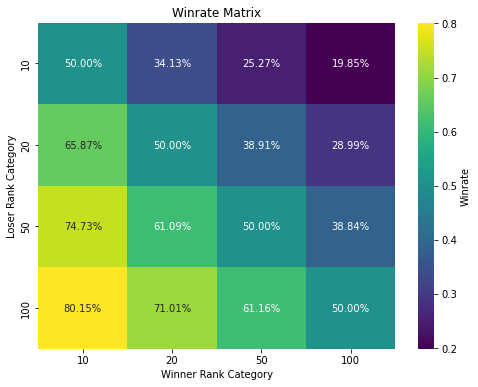

In [10]:
df_info_matches = pd.read_csv('./Data/Data_utiles/info_matches.csv')
 
def calculate_winrate_matrix(df_info_matches):
    # Définir les catégories de classement
    rank_categories = [1,10, 20, 50, 100]
 
    # Initialiser une matrice pour stocker les winrates
    winrate_matrix = np.zeros((len(rank_categories), len(rank_categories)))
 
    for i in range(1,len(rank_categories)):
        for j in range(1,len(rank_categories)):
            # Filtrer les lignes où le winner_rank est dans la catégorie i et le loser_rank est dans la catégorie j
            winners_vs_losers = df_info_matches[
                (df_info_matches['winner_rank'] <= rank_categories[i]) & (df_info_matches['winner_rank'] >= rank_categories[i-1]) &
                (df_info_matches['loser_rank'] <= rank_categories[j]) & (df_info_matches['loser_rank'] >= rank_categories[j-1])
            ]
            losers_vs_winners = df_info_matches[
                (df_info_matches['winner_rank'] <= rank_categories[j]) & (df_info_matches['winner_rank'] >= rank_categories[j-1]) &
                (df_info_matches['loser_rank'] <=rank_categories[i]) & (df_info_matches['loser_rank'] >= rank_categories[i-1])
            ]
 
            # Vérifier si la somme des longueurs est non nulle
            total_matches = len(winners_vs_losers) + len(losers_vs_winners)
            if total_matches > 0:
                # Calculer le winrate pour cette catégorie de classement
                winrate = len(winners_vs_losers) / total_matches
 
                # Stocker le winrate dans la matrice
                winrate_matrix[i, j] = winrate
 
    # Créer un DataFrame à partir de la matrice
    winrate_df = pd.DataFrame(winrate_matrix, index=rank_categories, columns=rank_categories)
 
    return winrate_df
 
# Exemple d'utilisation
df_winrate_matrix = calculate_winrate_matrix(df_info_matches)
df_winrate_matrix = df_winrate_matrix.iloc[1:, 1:]
 
 
import matplotlib.pyplot as plt
import seaborn as sns  # Assurez-vous d'avoir seaborn installé (pip install seaborn)
 
 
# Créer une heatmap avec Matplotlib et Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_winrate_matrix.T, annot=True, fmt=".2%", cmap="viridis", cbar_kws={'label': 'Winrate'})
 
plt.title("Winrate Matrix")
plt.xlabel("Winner Rank Category")
plt.ylabel("Loser Rank Category")
 
plt.show()

La heatmap présentée illustre les taux de victoire entre différents groupes de joueurs classés. Les rangs sont divisés en catégories telles que le top 10, le top 20, et ainsi de suite jusqu'au top 100. On observe une tendance générale selon laquelle les joueurs de catégories supérieures ont un taux de victoire plus élevé contre ceux de catégories inférieures. Par exemple, les joueurs du top 100 ont un taux de victoire impressionnant de 80.15\% contre les joueurs du top 10, indiquant une forte corrélation entre le rang et la performance. Cette tendance est cohérente à travers la matrice, suggérant une hiérarchie compétitive bien définie où le rang prédit de manière significative le résultat des confrontations.


# 2- Différences statistiques entre les deux classes de joueurs ?

Dans cette partie, nous voulons représenter les différences sur l'aspects statistiques des joueurs classé dans le top 10 et ceux dans le top 40 et 50.

Pour se faire nous allons calculer les moyennes de certaines stats-clés et les tracer au fil du temps pour les deux classes de joueurs

In [11]:
df=pd.read_csv('./Data/Data_utiles/info_joueurs.csv')
df_rank=pd.read_csv('./Data/Data_utiles/info_rank_after_treatment')
df_rank.head()
    

Unnamed: 0  ranking_date  rank  player_id  points name_first name_last  \
0           0      19900101     1     100656  2913.0       Ivan     Lendl   
1           1      19900101     2     101414  2279.0      Boris    Becker   
2           2      19900101     3     101222  2111.0     Stefan    Edberg   
3           3      19900101     4     100763  1398.0       Brad   Gilbert   
4           4      19900101     5     100581  1354.0       John   McEnroe   

  hand  height  
0    R   188.0  
1    R   190.0  
2    R   188.0  
3    R   185.0  
4    L   180.0

In [12]:
resultat_filtre = df_rank[(df_rank['ranking_date'] == 19950102) & (df_rank['rank'].between(1, 10))]
id_joueur_top10_95=[]

for i in resultat_filtre:
    id_joueur_top10_95.append(resultat_filtre['player_id'])
player_ids_filtrés = df_rank.loc[resultat_filtre.index, 'player_id'].tolist()


print(player_ids_filtrés)


[101948, 101736, 101414, 101843, 101964, 102021, 101222, 102238, 101529, 101774]


maintenant, on va récupérer un dataframe composé de toutes les stats pour l'année 1995 de notre joueur compris dans le top 10 en 1995 et calculer  la moyenne  sur l'année de nos catégories pour un top 10

In [13]:


df_filtre = df[df['id'].isin(player_ids_filtrés)]
resultat = df_filtre[['id', '1995']]['1995']
L = []

for i in resultat:
    # Convertir la chaîne de caractères en dictionnaire en utilisant 
    i_dict = ast.literal_eval(i)
    L.append(i_dict)


test = pd.DataFrame({
    'année':L})

def average_dict_values(df, column_name):
    column = df[column_name]

    # Créer un dictionnaire pour stocker la moyenne de chaque clé
    average_dict = {}

    # Parcourir chaque dictionnaire dans la colonne
    for dictionary in column:
        # on s'assure que la valeur est un dictionnaire
        if isinstance(dictionary, dict):
            
            for key, value in dictionary.items():
                # Vérifier le type de la valeur
                if key not in average_dict:
                    average_dict[key] = 0
                
                if isinstance(value, str):
                    # Vérifier si la valeur est en pourcentage
                    if '%' in value:
                        value = float(value.rstrip('%')) / 100.0
                    else:
                        value = float(value)
                    average_dict[key] += value
                elif isinstance(value, (int, float)):
                    average_dict[key] += value
                else:
                    print(f"La valeur {value} pour la clé {key} n'est pas de type numérique.")

    # Calculer la moyenne finale en divisant par le nombre total de matchs
    num_dicts = len(column)
    for key in average_dict:
        average_dict[key] /= num_dicts

    return average_dict



In [14]:

def average_dict_values(df, column_name):
    # Récupérer la colonne avec les dictionnaires
    column = df[column_name]

    # Créer un dictionnaire pour stocker la moyenne de chaque clé
    average_dict = {}

    # Parcourir chaque dictionnaire dans la colonne
    for dictionary in column:
        # S'assurer que la valeur est un dictionnaire
        if isinstance(dictionary, dict):
            # Parcourir chaque clé et ajouter la valeur à la moyenne
            for key, value in dictionary.items():
                # Vérifier le type de la valeur
                if key not in average_dict:
                    average_dict[key] = 0
                # Si la valeur est une chaîne de caractères représentant un nombre, convertir et ajouter à la moyenne
                if isinstance(value, str):
                    # Vérifier si la valeur est en pourcentage
                    if '%' in value:
                        value = float(value.rstrip('%')) / 100.0
                    else:
                        value = float(value)
                    average_dict[key] += value
                elif isinstance(value, (int, float)):
                    average_dict[key] += value
                else:
                    print(f"La valeur {value} pour la clé {key} n'est pas de type numérique.")

    # Calculer la moyenne finale en divisant par le nombre total de dictionnaires
    num_dicts = len(column)
    for key in average_dict:
        average_dict[key] /= num_dicts

    return average_dict



In [15]:
# Définir la plage d'années souhaitées qui correspondent à la dernière date dont le classement est pris en compte dans info_rank
annees = ['19951225', '19961230', '19971229', '19981228', '19991227', '20001225', '20011231', '20021230', '20031229', '20041227', '20051226', '20061225', '20071231', '20081229', '20091228', '20101227', '20111226', '20121231', '20131230', '20141229', '20151228', '20161226', '20171225', '20181231', '20191230', '20201228', '20211227', '20221226']


# Dictionnaire final pour stocker les résultats par année
resultats_par_anneetop10 = {}


for annee in annees:
    # Filtrer les données pour l'année spécifique
    resultat_filtre = df_rank[(df_rank['ranking_date'] == int(annee)) & (df_rank['rank'].between(1, 10))]
    id_joueurs_top10 = resultat_filtre['player_id'].tolist()

    # Filtrer le dataframe principal en utilisant les ID des joueurs
    df_filtre = df[df['id'].isin(id_joueurs_top10)]

   
    resultat = df_filtre[['id', str(annee)[:4]]][str(annee)[:4]]
    L = []
    for i in resultat:
        i_dict = ast.literal_eval(i)
        L.append(i_dict)
        

    data_annee = pd.DataFrame({'année': L})

    # Calculer la moyenne des valeurs pour chaque année
    resultats_par_anneetop10[annee] = average_dict_values(data_annee, 'année')




In [16]:


def resultats_par_annee_moyens(df, df_rank, years,rang_a,rang_b):
    # Dictionnaire final pour stocker les résultats par année
    resultats_par_annee = {}

    # Itération sur les années
    for annee in years:
        # Filtrer les données pour l'année spécifique
        resultat_filtre = df_rank[(df_rank['ranking_date'] == int(annee)) & (df_rank['rank'].between(rang_a, rang_b))]
        id_joueurs = resultat_filtre['player_id'].tolist()

        # Filtrer le dataframe principal en utilisant les ID des joueurs
        df_filtre = df[df['id'].isin(id_joueurs)]

        # Extraire la colonne correspondant à l'année et convertir les chaînes de caractères en dictionnaires
        resultat_colonne = df_filtre[['id', str(annee)[:4]]][str(annee)[:4]]
        L = []
        for i in resultat_colonne:
            i_dict = ast.literal_eval(i)
            L.append(i_dict)

        # Créer un dataframe avec les dictionnaires extraits
        data_annee = pd.DataFrame({
            'année': L
        })

        # Calculer la moyenne des valeurs pour chaque année
        resultats_par_annee[str(annee)[:4]] = average_dict_values(data_annee, 'année')

    return resultats_par_annee





On calcule enfin les résultats moyens par années entre un joueur du top 10 et un joueur classé entre la 40 et la 50ème places mondiales. 

In [17]:
resultats_par_anneetop10 = resultats_par_annee_moyens(df, df_rank, annees,1,11)
resultats_par_anneetop40_50 = resultats_par_annee_moyens(df, df_rank, annees,40,50)



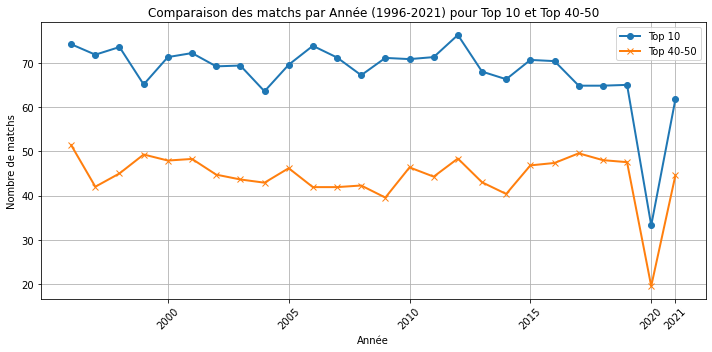

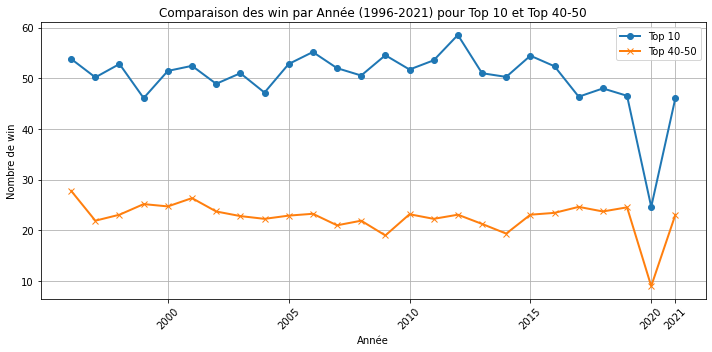

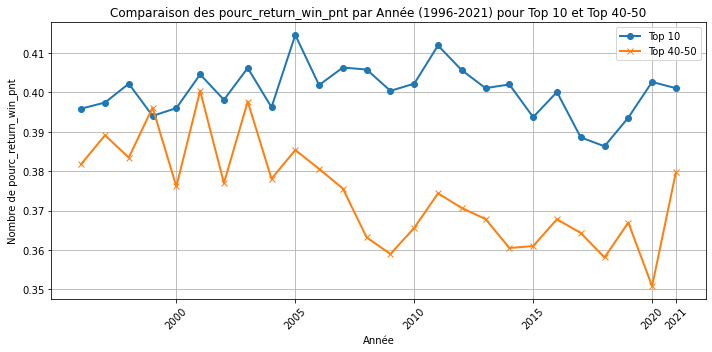

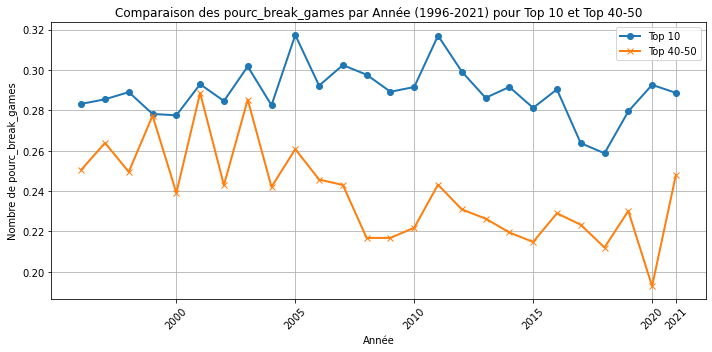

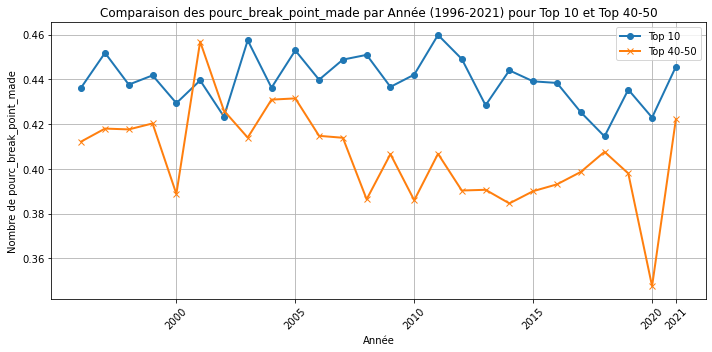

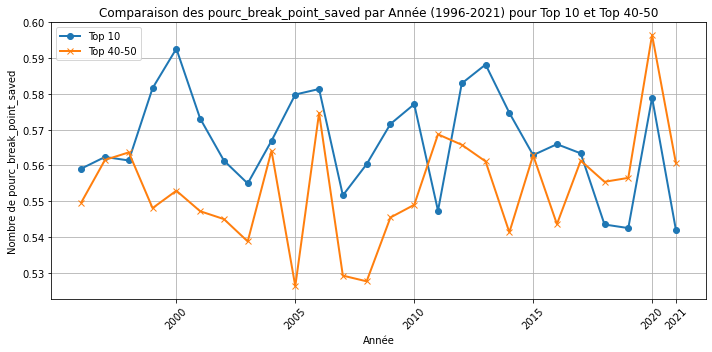

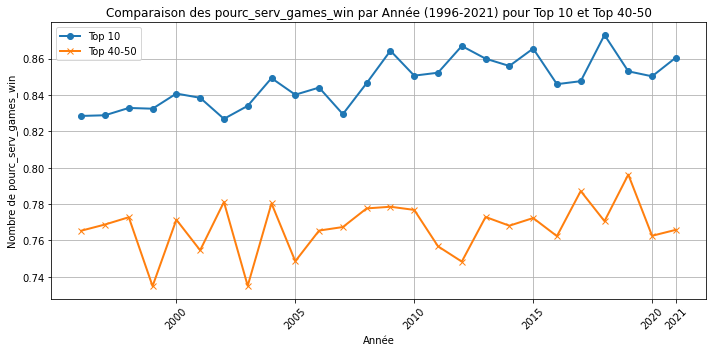

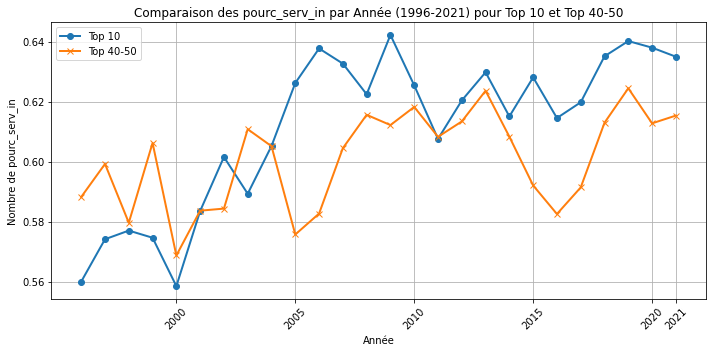

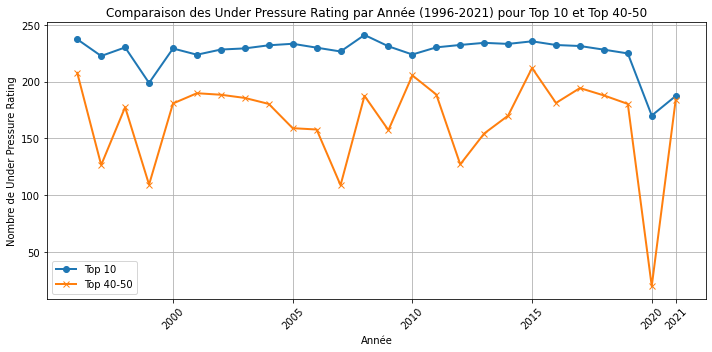

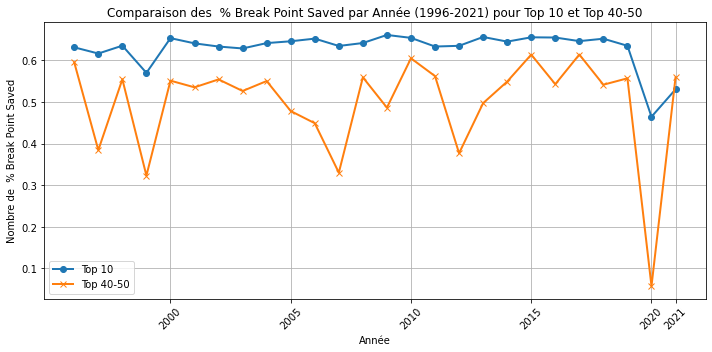

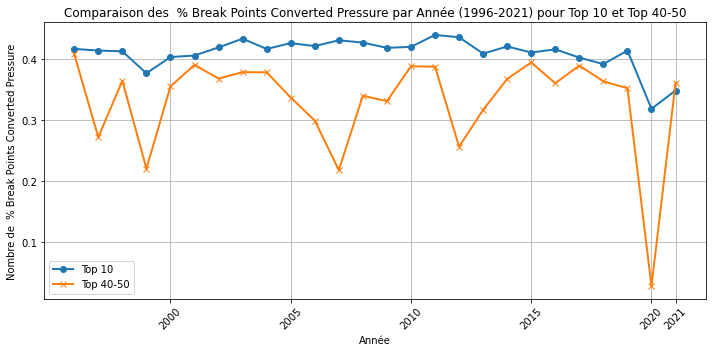

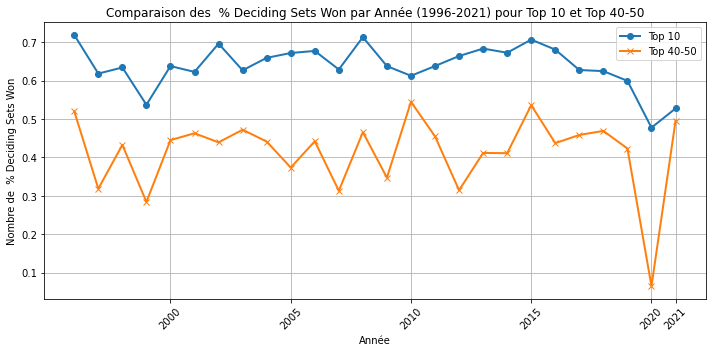

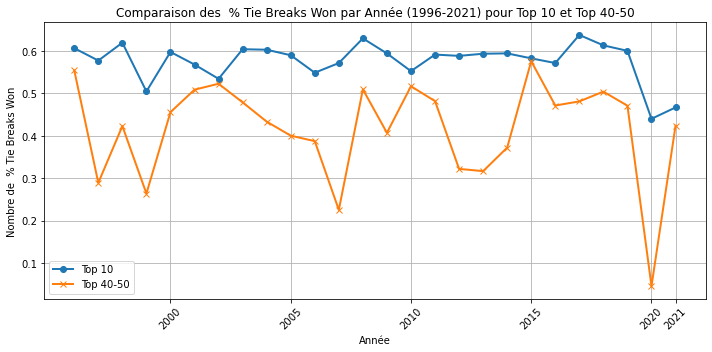

In [29]:
def generer_graphique(resultats_top10, resultats_top40_50, annee_debut=1996, annee_fin=2021, statistique='matchs'):
    # Générer la liste des années
    annees = [str(annee) for annee in range(annee_debut, annee_fin + 1)]

    # Extraire les valeurs pour la statistique donnée
    valeurs_top10 = [resultats_top10.get(annee, {}).get(statistique, 0) for annee in annees]
    valeurs_top40_50 = [resultats_top40_50.get(annee, {}).get(statistique, 0) for annee in annees]

    plt.figure(figsize=(10, 5))
    plt.plot(annees, valeurs_top10, label='Top 10', marker='o', linestyle='-', linewidth=2)
    plt.plot(annees, valeurs_top40_50, label='Top 40-50', marker='x', linestyle='-', linewidth=2)
    
    plt.title(f'Comparaison des {statistique} par Année ({annee_debut}-{annee_fin}) pour Top 10 et Top 40-50')
    plt.xlabel('Année')
    plt.ylabel(f'Nombre de {statistique}')
    plt.xticks([annee for annee in annees if annee.endswith('0') or annee.endswith('5') or annee == str(annee_fin)], rotation=45)
    plt.legend()
    plt.grid(True)  
    plt.tight_layout() #pour s'assurer que tout rentre bien
    plt.show()

cles_liste = [
    'matchs',
    'win',
    'pourc_return_win_pnt',
    'pourc_break_games',
    'pourc_break_point_made',
    'pourc_break_point_saved',
    'pourc_serv_games_win',
    'pourc_serv_in',
    'Under Pressure Rating',
    ' % Break Point Saved',
    ' % Break Points Converted Pressure',
    ' % Deciding Sets Won',
    ' % Tie Breaks Won'
]
for i in cles_liste:
    generer_graphique(resultats_par_anneetop10,resultats_par_anneetop40_50,annee_debut=1996,annee_fin=2021,statistique=str(i))
 


A partir de ces différents graphiques représentants les principales statistiques sur lesquels on peut se baser pour évaluer le niveau de jeux (sans entrer dans le détails plus complexe de ce qui se passe pendant le point et qui peut être encore plus propre à différents styles de jeux), on peut observer un net écart de niveau statistiques entre les deux populations étudier. De plus, ces statistiques s'améliorent pour chaque catégorie avec le temps, ce qui peut laisser présager à une évolution globale de niveau de jeux. 

## Analyse des Performances

Nous présentons une analyse détaillée des performances comparatives des joueurs classés dans le top 10 et le top 40-50 sur une période s'étendant de 1996 à 2021. Chaque métrique examinée apporte un éclairage sur les différentes facettes de la compétitivité et de la réussite dans leur domaine.

### Matchs Joués
Le nombre de matchs joués par les joueurs du top 10 reste remarquablement constant, témoignant de leur régularité au plus haut niveau. En revanche, les joueurs du top 40-50 montrent plus de fluctuations, possiblement indiquant une concurrence plus serrée et une moins grande stabilité dans ces rangs.

### Victoires Accumulées
Les joueurs du top 10 accumulent un nombre plus élevé de victoires par an, ce qui souligne leur excellence et leur capacité à maintenir leur rang dans le temps. Cela reflète également la difficulté pour les joueurs du top 40-50 de percer dans le cercle très fermé du top 10.

### Points Clés Sauvés
La capacité à sauver des points clés sous pression est cruciale. Les joueurs du top 10 démontrent une résilience remarquable, sauvant plus de points clés et gérant mieux la pression comparativement à leurs homologues du top 40-50.

### Matchs Gagnés sur Service
La maîtrise du jeu sur leur service est un indicateur de la confiance et de la domination d'un joueur. Le top 10 affiche une meilleure performance sur leurs jeux de service, ce qui peut être un facteur déterminant dans les matchs serrés.

### Points de Break Sauvés
Le pourcentage de points de break sauvés par les joueurs du top 10 est plus élevé, ce qui suggère une meilleure gestion des moments critiques et une plus grande capacité à inverser la dynamique d'un match.

### Jeux de Retour Gagnés
La capacité à gagner des jeux sur le service adverse est un indicateur de la force offensive d'un joueur. Les joueurs du top 10 semblent plus efficaces pour briser le service de l'adversaire, ce qui leur confère un avantage tactique.

### Performance sous Pression
Enfin, la comparaison des performances sous pression révèle que les joueurs du top 10 restent plus cohérents et performants même dans les situations les plus tendues, ce qui est souvent ce qui les distingue des joueurs de rangs inférieurs.

Chaque graphique souligne l'écart de performance entre les joueurs du top 10 et ceux du top 40-50, offrant des perspectives sur les qualités nécessaires pour atteindre et se maintenir au sommet. Ces tendances donnent un aperçu des défis rencontrés par les joueurs aspirant à monter dans le classement, et des caractéristiques qui séparent les élites du reste.


# 3- Comparaison entre joueurs de même classe



$\textbf{IMPORTANT}$ : Pour factoriser le code, nous avons créer une classe Joueur qui est dans le fichier class_joueur.py.
Celle ci permet l'affichage de certains graphiques ci-dessous et sera surtout utiles pour l'interface graphique.

Pour chaque joueur, Nous pouvons:

- Afficher certaines de ses caractéristques
- Plot ses stats sur une année
- Plot l'évolution de son rang au fil de sa carrière

### Novak Djokovic

Informations pour novak djokovic 
taille : 188.0
main : R


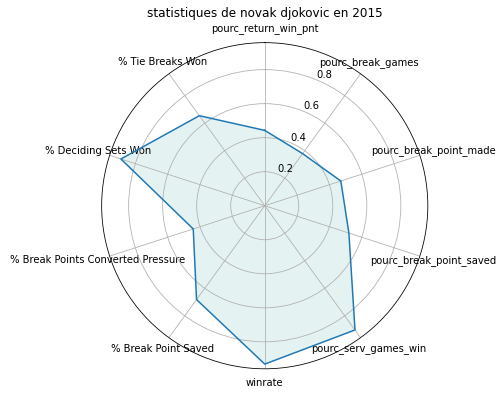

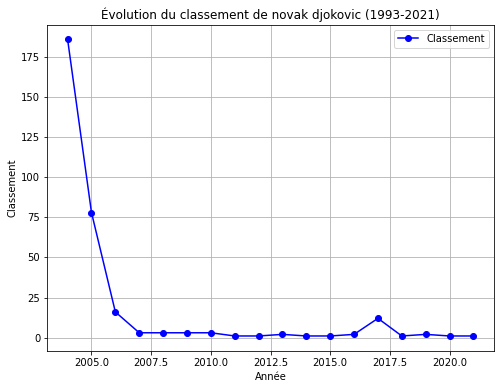

In [19]:
Djoko=cj.joueur("novak djokovic")
print(Djoko)
Djoko.vis_stats(2015)
Djoko.vis_rang()

### Rafael Nadal

Informations pour rafael nadal 
taille : 185.0
main : L


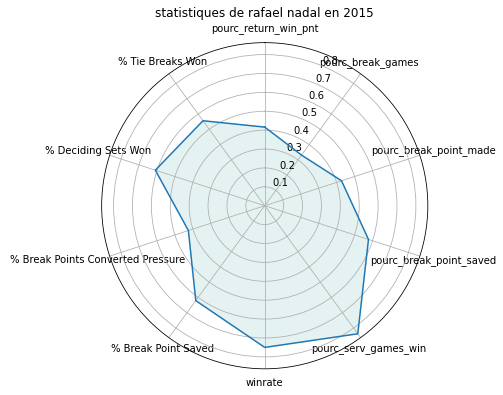

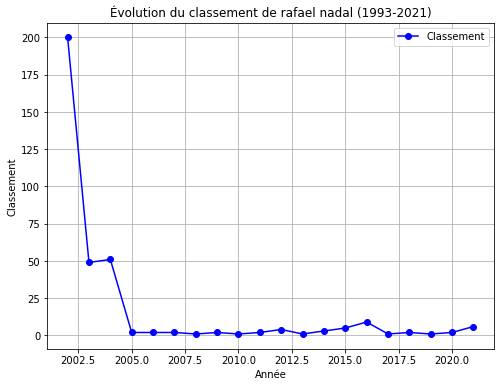

In [20]:
rafa=cj.joueur("rafael nadal")
print(rafa)
rafa.vis_stats(2015)
rafa.vis_rang()

### Roger Federer

Informations pour roger federer 
taille : 185.0
main : R


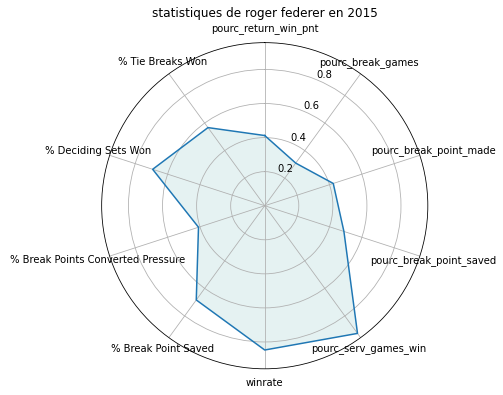

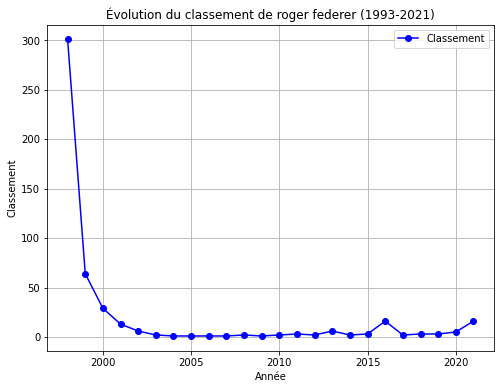

In [21]:
roger=cj.joueur("roger federer")
print(roger)
roger.vis_stats(2015)
roger.vis_rang()

### Richard Gasquet

Informations pour richard gasquet 
taille : 185.0
main : R


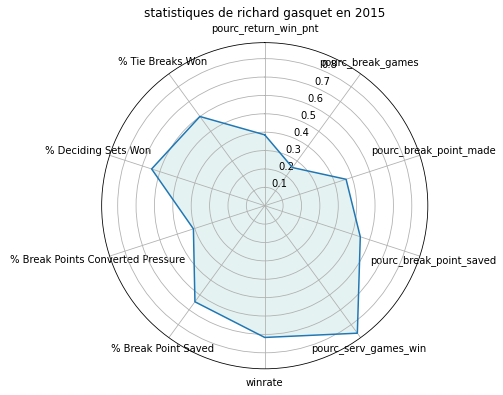

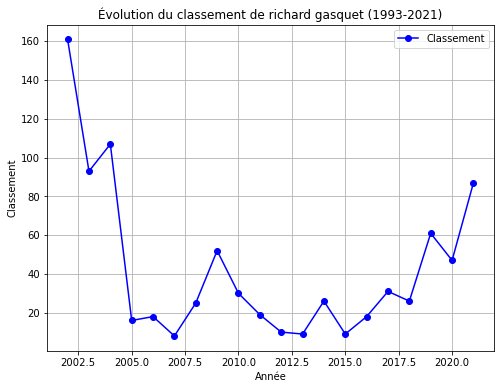

In [22]:
rich=cj.joueur("richard gasquet")
print(rich)
rich.vis_stats(2015)
rich.vis_rang()

### Maintenant, on va superposer deux graphiques pour comparer les performances d'athètes en focntion des années.

In [9]:


# Lecture des données
df_infos_joueurs = pd.read_csv('./Data/Data_utiles/info_joueurs.csv')

# Conversion des pourcentages en décimaux
def convert_percentages_to_decimals(input_dict):
    for key, value in input_dict.items():
        if isinstance(value, str) and value.endswith('%'):
            input_dict[key] = float(value.strip('%')) / 100
    return input_dict

class PlayerRadarChart:
    def __init__(self, data):
        self.data = data
        self.categories = list(data.keys())  # Les clés deviennent les catégories
        self.values = [data[key] for key in self.categories] + [data[self.categories[0]]]  # Valeurs circulaires
        self.angles = np.linspace(0, 2 * np.pi, len(self.categories), endpoint=False).tolist()
        self.angles += [self.angles[0]]  # Angles circulaires

    def plot_on_ax(self, ax, color, label):
        ax.plot(self.angles, self.values, color=color, linewidth=2, linestyle='solid', label=label)
        ax.fill(self.angles, self.values, color=color, alpha=0.25)
        ax.set_xticks(self.angles[:-1])
        ax.set_xticklabels(self.categories, color='grey', size=8)  # Ajout des étiquettes de catégorie




In [10]:
def generate_comparison_radar_chart(player1_name, player2_name, year1, year2):
  
    def prepare_player_data(player_name, year):
        player_info = df_infos_joueurs[df_infos_joueurs['name'] == player_name]
        if player_info.empty or str(year) not in player_info:
            print(f"No data available for {player_name} in {year}.")
            return None

        year_data_str = player_info[str(year)].values[0]
        year_data_dict = ast.literal_eval(year_data_str)
        year_data_dict['winrate']=year_data_dict['win']/year_data_dict['matchs']

        
        year_data_dict = convert_percentages_to_decimals(year_data_dict)
        filtered_data = {key: year_data_dict[key] for key in keys_to_plot if key in year_data_dict}
        return filtered_data

    
    keys_to_plot = ['pourc_return_win_pnt', 'pourc_break_games', 'pourc_break_point_made',
        'pourc_break_point_saved', 'pourc_serv_games_win', 'pourc_serv_in',
        ' % Break Point Saved', ' % Break Points Converted Pressure',
        ' % Deciding Sets Won', ' % Tie Breaks Won','winrate']

    
    player1_data_year1 = prepare_player_data(player1_name, year1)
    player2_data_year2 = prepare_player_data(player2_name, year2)


    if any(data is None for data in [player1_data_year1,  player2_data_year2]):
        return

    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    radar_chart1_y1 = PlayerRadarChart(player1_data_year1)
    
    
    radar_chart2_y2 = PlayerRadarChart(player2_data_year2)

    
    radar_chart1_y1.plot_on_ax(ax, 'red', f'{player1_name} {year1}')
    radar_chart2_y2.plot_on_ax(ax, 'orange', f'{player2_name} {year2}')

    
    ax.legend(loc='upper right')
    plt.title(f'Comparison: {player1_name} vs {player2_name} ({year1} vs {year2})', size=15)
    plt.show()

On compare maitenant les performances de Rafael Nadal entre deux années et peut voir que ses statistiques sont très proches : il semblerait donc que l'importance du top niveau, c'est avant tout la régularité. Il suffit de voir les différences de statistiques de Rafael Nadal d'une année à l'autre : son pourcentage de jeu de service gagné est quasiment égal entre 2013 et 2014 !

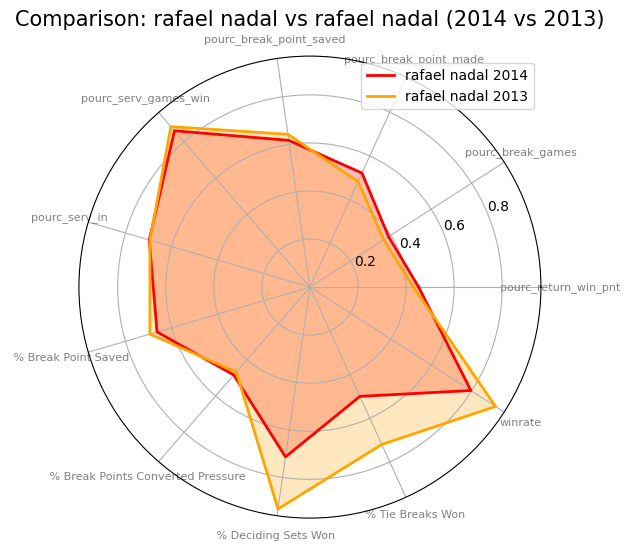

In [11]:
generate_comparison_radar_chart("rafael nadal","rafael nadal",2014,2013)

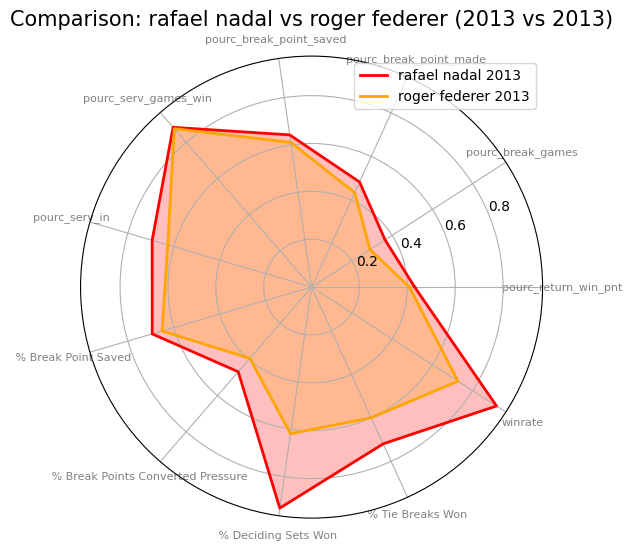

In [12]:
generate_comparison_radar_chart("rafael nadal","roger federer",2013,2013)

On peut conclure ici que sur l'année 2013, Roger Federer a globalement été moins performant sur les statistiques que Rafael Nadal en 2013. Nous avons choisi ces 2 années car elles sont considérees comme les années les moins profiliques en termes de tournois gagnés pour chaqun des joueurs. De ce fait, on peut imaginer que leurs statistiques soient moins dominantes en comparaison avec le reste du circuit pour ces deux légendes.



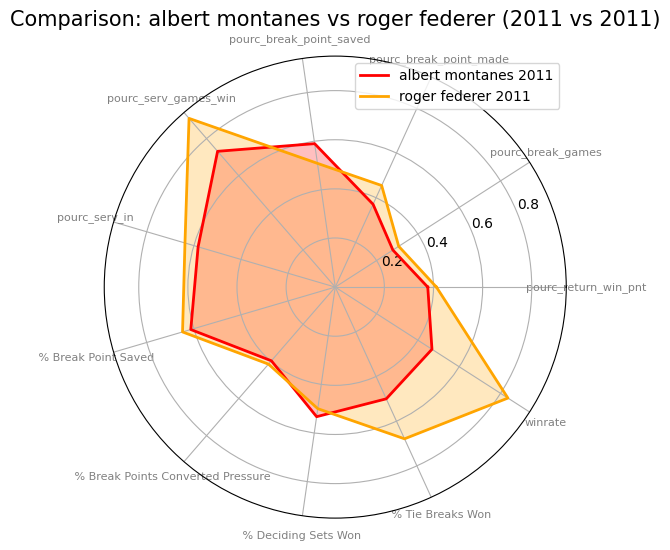

In [13]:
generate_comparison_radar_chart("albert montanes","roger federer",2011,2011)
# rang roger federer : 3
# rang albert montanes : 53

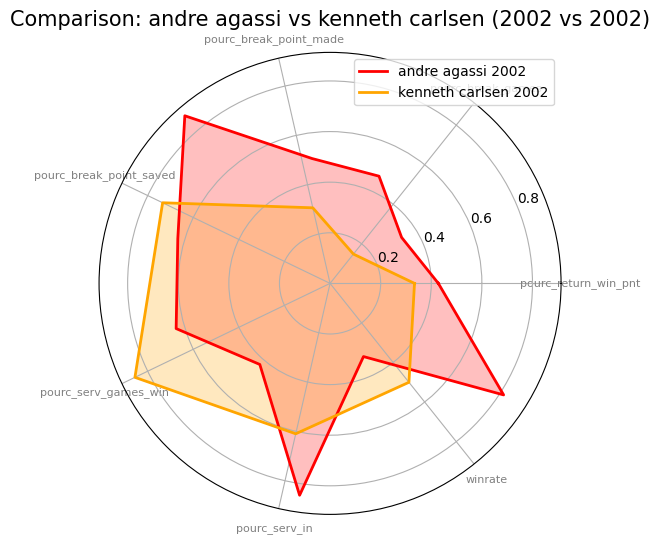

In [14]:
generate_comparison_radar_chart("andre agassi","kenneth carlsen",2002,2002)
#rang andre agassi : 2
# kenneth carlsen : 65

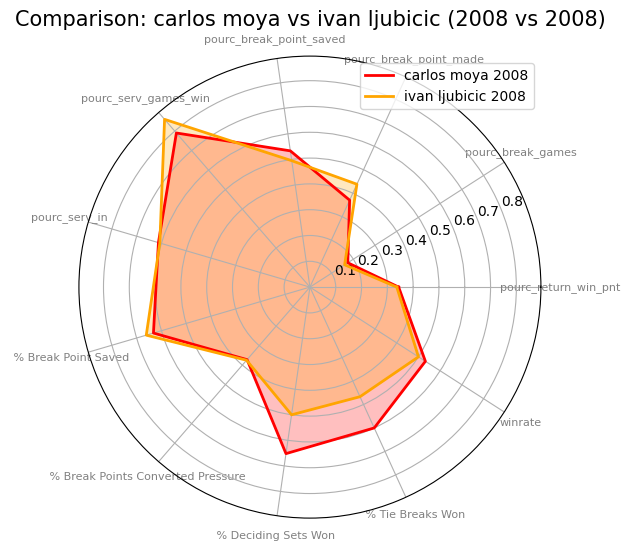

In [15]:
generate_comparison_radar_chart("carlos moya","ivan ljubicic",2008,2008)
#rang carlos moya : 44
#rang ivan ljubicic : 42